# Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline

In [2]:
### userinformation

In [3]:
userinfo = pd.read_csv('user_information.csv')
userinfo_505 = userinfo.loc[userinfo.user_id == 505,:]
userinfo_505

,user_id,birth year,age,sex,etc,depression_score,depression_class
20,505,1946,76,F,Not applicable,0.5,Moderate


In [4]:
### annotation file

In [5]:
data_505 = pd.read_csv('505.csv')

In [6]:
data_505['start'] = pd.to_datetime(data_505['start'])
data_505['end'] = pd.to_datetime(data_505['end'])

In [7]:
data_505.dtypes

start        datetime64[ns]
end          datetime64[ns]
labelName            object
dtype: object

In [8]:
data_505.head()

,start,end,labelName
0,2020-08-07 18:00:00,2020-08-07 18:30:00,Go to bathroom
1,2020-08-07 20:00:00,2020-08-07 20:30:00,Cook
2,2020-08-08 10:30:00,2020-08-08 11:00:00,Go to bathroom
3,2020-08-08 10:30:00,2020-08-08 11:00:00,Cook
4,2020-08-08 12:30:00,2020-08-08 13:00:00,Cook


In [9]:
data_505['labelName'].value_counts()

Go to bathroom    1516
Cook              1243
Wash dishes        643
Eat                532
Sleep              374
Take shower        216
Wake up            197
Take medicine       61
Go walk             17
Watch TV             1
Name: labelName, dtype: int64

In [10]:
### device uplink

In [11]:
device = pd.read_csv('device_uplink.csv')
device = device.drop(['Unnamed: 0'], axis=1)
device = device.dropna()
device = device.loc[device['client_time']>device['client_time'].min()]
device = device.loc[device['step']>device['step'].min()]
device = device.loc[device['owner_id']>0]
index = device[device['tag_id']==0].index
device.drop(index, inplace=True)
index = device[device['tag_id']>17].index
device.drop(index, inplace = True)

In [12]:
device_505 = device.loc[device.owner_id == 505,:].reset_index()
device_505

,index,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
0,16439,543864,505,2020-08-07 18:06:39,2.0,10,9,0,0
1,16441,543882,505,2020-08-07 18:08:51,2.0,57,7,0,0
2,16443,543890,505,2020-08-07 18:09:42,2.0,72,5,0,0
3,16558,545631,505,2020-08-07 20:22:21,9.0,97,87,0,0
4,16925,551726,505,2020-08-08 10:38:31,10.0,62,57,0,0
...,...,...,...,...,...,...,...,...,...
10077,324798,3771783,505,2021-03-11 15:55:13,10.0,6954,36,0,0
10078,324799,3771784,505,2021-03-11 15:55:22,10.0,6967,35,0,0
10079,324801,3771787,505,2021-03-11 15:55:32,10.0,6969,35,0,0
10080,324811,3771847,505,2021-03-11 15:58:53,9.0,7081,35,0,0


# Visualize

# Analysis of step pattern

In [13]:
#Annual review of STEP

In [14]:
device_year = device_505[(device_505['client_time']>'2020-03-10')&(device_505['client_time']<'2021-03-11')]
device_year['client_time'] = pd.to_datetime(device_year['client_time'])

<ipython-input-14-12d89fa67e7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_year['client_time'] = pd.to_datetime(device_year['client_time'])


<AxesSubplot:xlabel='client_time', ylabel='step'>

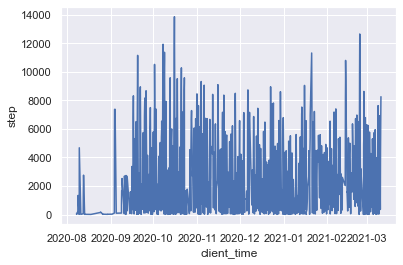

In [15]:
sns.lineplot(
    data=device_year, 
    x="client_time", y="step"
)

In [16]:
#Monthly review of STEP

In [17]:
device_month = device_505[(device_505['client_time']>'2021-02-11')&(device_505['client_time']<'2021-03-11')]
device_month['client_time'] = pd.to_datetime(device_month['client_time'])

<ipython-input-17-f931ab3bbded>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_month['client_time'] = pd.to_datetime(device_month['client_time'])


<AxesSubplot:xlabel='client_time', ylabel='step'>

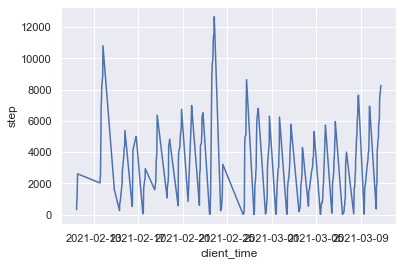

In [18]:
sns.lineplot(
    data=device_month,
    x="client_time", y="step"
)

In [19]:
#Day review of STEP

In [20]:
device_day = device_505[(device_505['client_time']>'2021-03-10')&(device_505['client_time']<'2021-03-11')]
device_day['client_time'] = pd.to_datetime(device_day['client_time'])

<ipython-input-20-90d7fb9428d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_day['client_time'] = pd.to_datetime(device_day['client_time'])


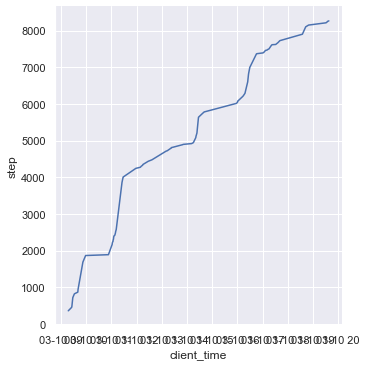

In [22]:
sns.relplot(
    data=device_day, kind="line",
    x="client_time", y="step")

If the number of steps today is above the average, a message of compliment is delivered. (Example: "You walked more than average! Great job.")

In [23]:
device_day_avg = device[(device['client_time']>'2021-03-10')&(device['client_time']<'2021-03-11')]['step'].mean()
if (device_day['step'].mean() >= device_day_avg) : 
    print("You walked more than other users!")
else :
    print("You walked less than other users")

You walked less than other users


# Daily noticification of chores to do today

In [24]:
# 12: sink, 16: vacuum cleaner, 17: washer
import numpy as np
checklist = np.full(3, False, dtype=bool)

for i in range(len(device_day)):
    if(np.any(device_day.tag_id == 12.0)):
        checklist[0] = True;
    elif(np.any(device_day.tag_id == 16.0)):
        checklist[1] = True;
    elif(np.any(device_day.tag_id == 17.0)):
        checklist[2] = True;

In [25]:
print("[A list of chores to do today]")
    
print("washing dishes : ")
if(checklist[0] == False):
    print("- You did it!")
else : print("- You need to do it.")
    
print("vacuum cleaner : ")
if(checklist[1] == False):
    print("- You did it!")
else : print("- You need to do it.")
    
print("washing : ")
if(checklist[2] == False):
    print("- You did it!")
else : print("- You need to do it.")

[A list of chores to do today]
washing dishes : 
- You need to do it.
vacuum cleaner : 
- You did it!
washing : 
- You did it!


# Montly review of your lifestyle 

In [26]:
ts = pd.Timestamp
data_sample = pd.DataFrame(index=range(0,len(data_505)), columns = {'hour', 'day', 'month', 'year', 'labelName'})
for i in range(len(data_sample)):
    data_sample['hour'][i] = ts(data_505['start'][i]).hour
    data_sample['day'][i] = ts(data_505['start'][i]).day
    data_sample['month'][i] = ts(data_505['start'][i]).month
    data_sample['year'][i] = ts(data_505['start'][i]).year
    data_sample['labelName'][i] = data_505['labelName'][i]

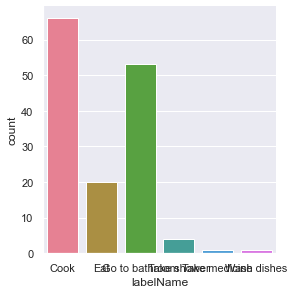

In [27]:
# What kind of activities did you do the most during the month?
sns.catplot(x="labelName",
                data=data_sample.loc[data_sample.month==3,:], kind="count",
                height=4, palette="husl");

# Anlysis of your cooking pattern

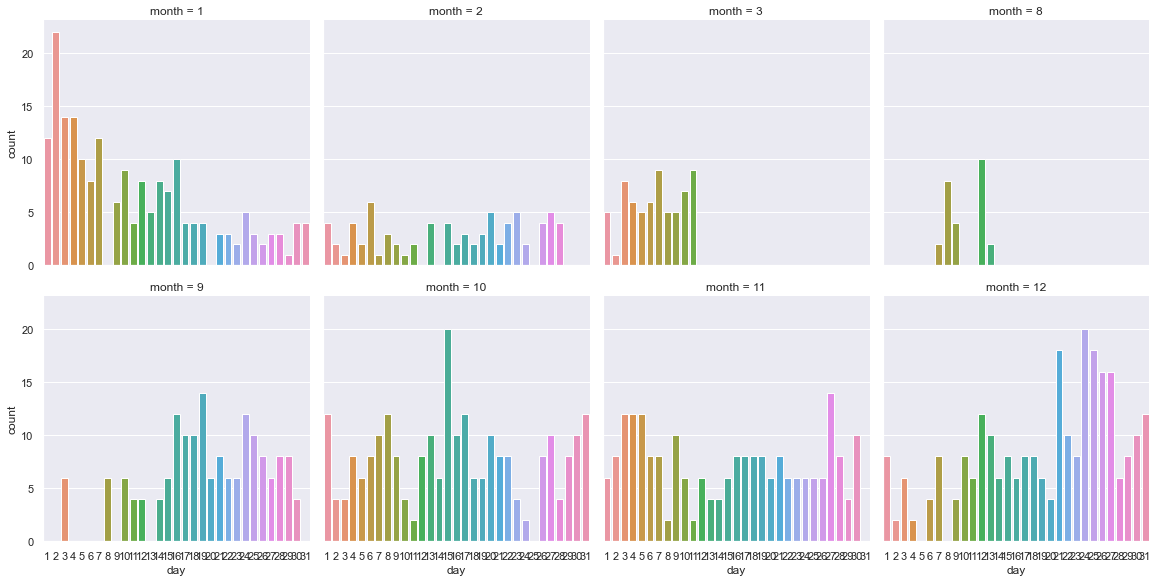

In [28]:
#How many times did you cook last month? 
sns.catplot(x="day", col="month", col_wrap=4, 
                data=data_sample.loc[data_sample.labelName=='Cook',:], kind="count",
                height=4);

In [29]:
#Compare the number of times you cooked this month 
#and the number of times you cooked last month

cook_thismonth = len(data_sample.loc[(data_sample.labelName=='Cook') & (data_sample.year==2021) & (data_sample.month==3),:])
cook_lastmonth = len(data_sample.loc[(data_sample.labelName=='Cook') & (data_sample.year==2021) & (data_sample.month==2),:])

if(cook_thismonth > cook_lastmonth) :
    print("You cooked more than last month")
else :
    print("You cooked less than last month")

You cooked less than last month


# Analysis of Time to Taking medicine

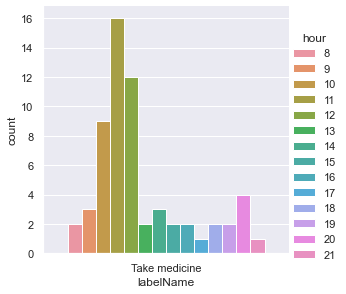

In [50]:
# Time to take medicine (1 year)
sns.catplot(x="labelName", hue="hour",
                data=data_sample.loc[data_sample.labelName=='Take medicine',:], kind="count",
                height=4);

# Daily noticification of taking medicine

In the case of a user suffering from a disease, an alarm is provided after checking whether the user is taking medicine.

In [30]:
# 6:Medicine
# If the monthly data shows that the user took the medicine, 
# we suppose the user takes the medicine.
medicine_checklist = np.full(1, False, dtype=bool)
if(any(device_month.tag_id == 6)):
    if(any(device_day.tag_id == 6)):
        medicine_checklist[0] = True;
        
print("[Taking Medicine]")
if(medicine_checklist[0] == False):
    print("- You need to take medicine")
else :
    print("- You already took it!")

[Taking Medicine]
- You already took it!


# Analysis of Time to Eat food

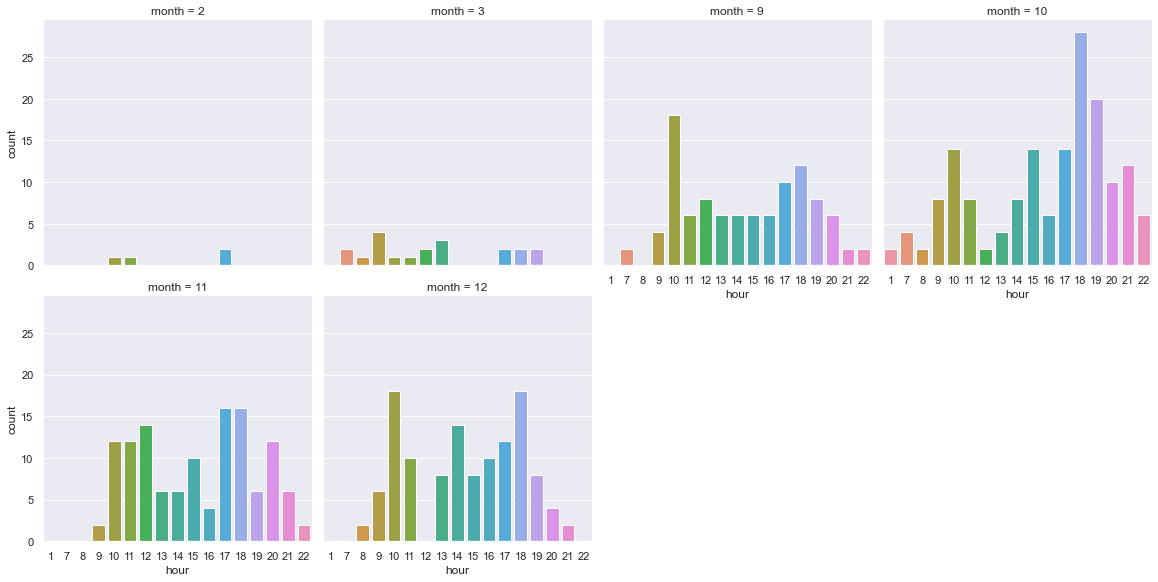

In [31]:
#Past data of the time when you eat food most often
sns.catplot(x="hour", col="month", col_wrap=4, 
                data=data_sample.loc[data_sample.labelName=='Eat',:], kind="count",
                height=4);

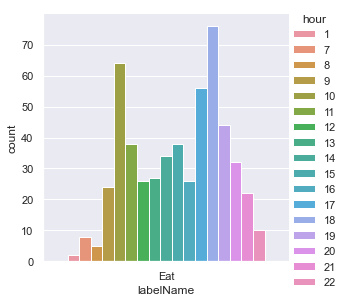

In [32]:
#You can check the time when you eat food most often and when you don't.
sns.catplot(x="labelName", hue="hour",
                data=data_sample.loc[data_sample.labelName=='Eat',:], kind="count",
                height=4);

# Analysis of sleep pattern

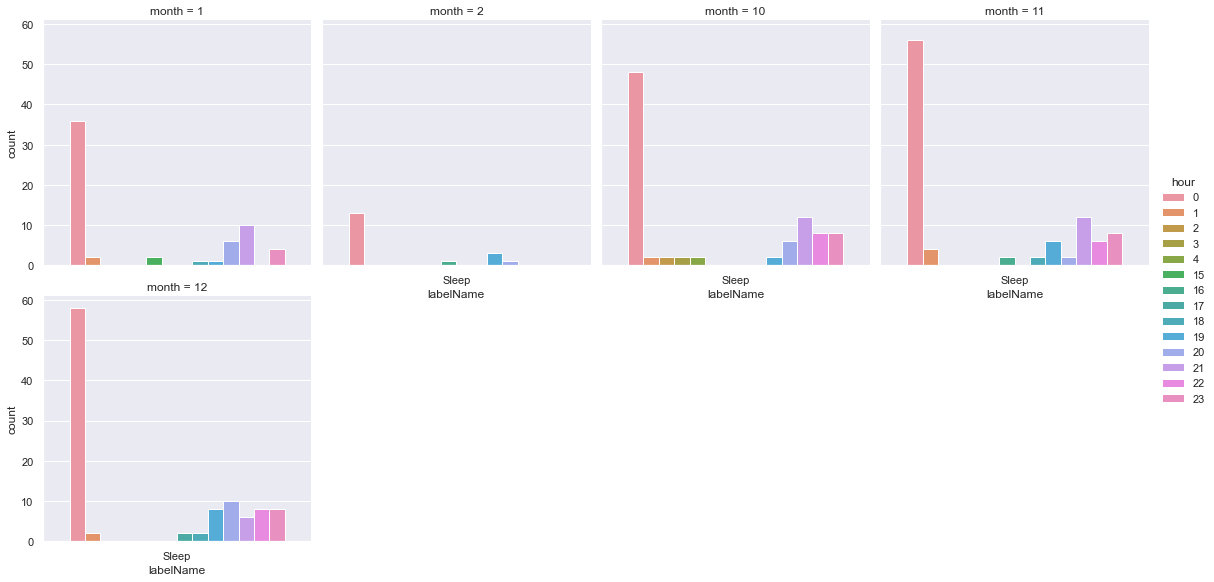

In [33]:
sns.catplot(x="labelName", col="month", col_wrap=4, hue="hour",
                data=data_sample.loc[data_sample.labelName=='Sleep',:], kind="count",
                height=4);

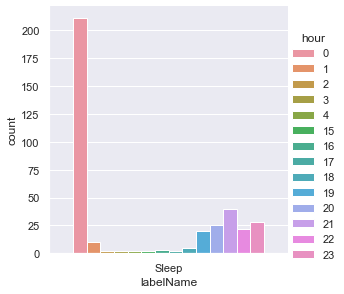

In [34]:
#total
sns.catplot(x="labelName", hue="hour",
                data=data_sample.loc[data_sample.labelName=='Sleep',:], kind="count",
                height=4);

In [35]:
#만약 최신의 sleep 데이터가 평균 sleep 보다 많이 늦다면(최빈값), 경고 알람 

In [38]:
sleep_mode = data_sample.loc[data_sample.labelName=='Sleep',:]['hour'].mode()[0] 
sleep_today = data_sample.loc[data_sample.labelName=='Sleep',:].iloc[-1,:]['hour']  

if(20 < sleep_today < sleep_mode+24):
    print("You slept early")
elif(sleep_mode < sleep_today < 6):
    print("You slept late")

You slept early


# Analysis of bathroom pattern

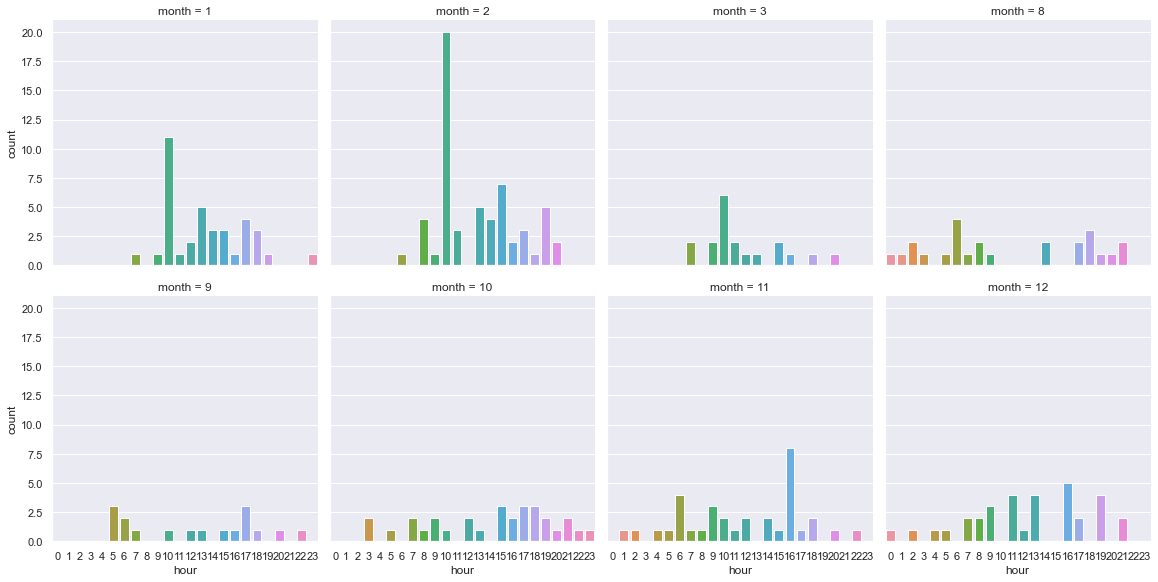

In [293]:
sns.catplot(x="hour", col="month", col_wrap=4, 
                data=data_sample.loc[data_sample.labelName=='Go to Bathroom',:], kind="count",
                height=4);

After calculating the average number of toilet visits by the user, an alarm message is provided if the number of toilet visits today is less than the average. 

In [39]:
bathroom_lastmonth = len(data_sample.loc[(data_sample.labelName=='Go to Bathroom') & (data_sample.year==2021) & (data_sample.month==2),:]) / 30
bathroom_today = len(data_sample.loc[(data_sample.labelName=='Go to Bathroom') & (data_sample.year==2021) & (data_sample.month==3) & (data_sample.day==20),:])

if(bathroom_today > bathroom_lastmonth) :
    print("You're going to the bathroom well!")
else :
    print("You need to go to bathroom more often.")

You need to go to bathroom more often.


# Analysis of Exercise pattern

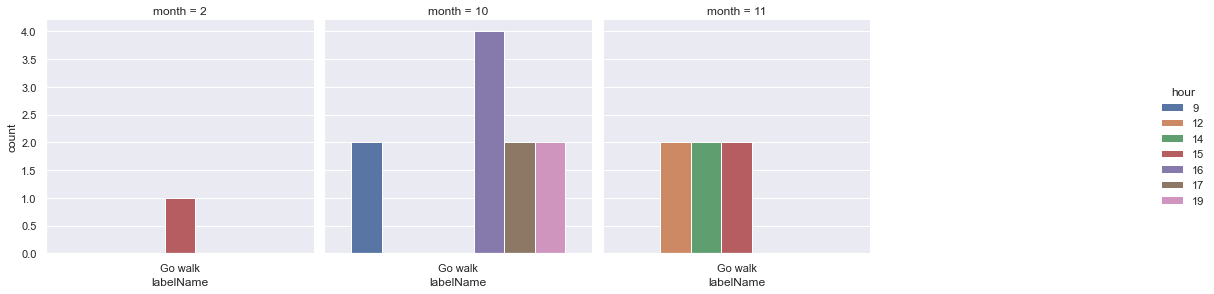

In [81]:
sns.catplot(x="labelName", col="month", col_wrap=4, hue="hour",
                data=data_sample.loc[(data_sample.labelName=='Go walk'),:], kind="count",
                height=4);

Provide advisory messages of exercise based on whether the user has worked out or not.

In [83]:
workout_lastmonth = len(data_sample.loc[(data_sample.labelName=='Go walk') & (data_sample.year==2021) & (data_sample.month==2),:]) / 30
workout_today = len(data_sample.loc[(data_sample.labelName=='Go walk') & (data_sample.year==2021) & (data_sample.month==3) & (data_sample.day==20),:])

if(workout_today > workout_lastmonth) :
    print("You did a good job!")
else :
    print("You need to go out and exercise more!")

You need to go out and exercise!


# Analysis of Mental health

In [84]:
userinfo_505

,user_id,birth year,age,sex,etc,depression_score,depression_class
20,505,1946,76,F,Not applicable,0.5,Moderate


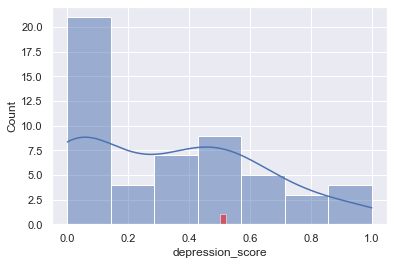

In [85]:
sns.histplot(x="depression_score",
                data=userinfo.loc[:,['depression_score']], kde=True)
# The user's depression level is red line
plt.hist(userinfo_505.iloc[0].depression_score, bins=50, alpha=0.5, color='red')
plt.show()

In [41]:
depression_avg

0.33962264150943394

In [42]:
# 사용자 전체 평균
depression_avg = userinfo.loc[:,['depression_score']].mean()[0]
if( userinfo_505.iloc[0].depression_score > depression_avg):
    print("Don't be depressed. You're doing great job!")
else:
    print("You have a healthier mind than other users.")

Don't be depressed. You're doing great job!


데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd

#데이터 불러오기


user1= pd.read_csv ('505b.csv')
user1 ['start'] = pd.to_datetime (user1 ['start'])
user1 ['end'] = pd.to_datetime (user1 ['end'])
import  datetime as  d
for  g in  range (len (user1 )):
    time = d.datetime.time (user1 ['start'].iloc [g ])
    user1 ['start'].iloc [g ] = time
    time = d.datetime.time (user1 ['end'].iloc [g ])
    user1 ['end'].iloc [g ] = time

print(user1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


         start       end       labelName
0     18:00:00  18:30:00  Go to bathroom
1     20:00:00  20:30:00            Cook
2     10:30:00  11:00:00  Go to bathroom
3     10:30:00  11:00:00            Cook
4     12:30:00  13:00:00            Cook
...        ...       ...             ...
4795  14:30:00  15:00:00  Go to bathroom
4796  15:00:00  15:30:00            Cook
4797  15:30:00  16:00:00  Go to bathroom
4798  16:00:00  16:30:00            Cook
4799  16:00:00  16:30:00            Cook

[4800 rows x 3 columns]


LinearRegression

In [ ]:
from numpy.ma.core import argmin
from  sklearn.model_selection import  train_test_split
from  sklearn.linear_model import  LinearRegression

lr = LinearRegression ()
train_target = user1 ['labelName'].astype ('category')
train_input = user1 ['start'].astype ('category')
train_input = pd.get_dummies (train_input )
train_target = pd.get_dummies (train_target )

train_scaled ,val_scaled ,train_target ,val_target = train_test_split (train_input , train_target ,test_size=0.2 , random_state=0)
lr.fit (train_scaled ,train_target )
pred=lr.predict (train_scaled )
pred_val = lr.predict(val_scaled)

#검증
print(lr.score(val_scaled,val_target))
print(pred_val[0])

Neural Net

In [ ]:
#Neural Net
#데이터 불러오기
import  matplotlib.pyplot as  plt
#라이브러리 임포트
from  tensorflow import  keras
#테스트세트와 검증세트 나누기
from  sklearn.model_selection import  train_test_split
from  sklearn.neural_network import  MLPClassifier
train_target = user1 ['labelName'].astype ('category')
train_input = user1 [['start','end']].astype ('category')
train_input = pd.get_dummies (train_input )
#train_target = pd.get_dummies (train_target )
train_scaled ,val_scaled ,train_target ,val_target = train_test_split (train_input , train_target ,test_size=0.2 , random_state=1 )

model = MLPClassifier (hidden_layer_sizes=(3),activation='logistic',solver='lbfgs',random_state=1 ,max_iter= 10000)
model.fit (train_scaled ,train_target)
#검증
pred_val = model.predict(val_scaled)
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(val_target,pred_val))

0.48333333333333334


Random Forest

In [ ]:
#Random Forest
import  numpy as  np
import  pandas as  pd
from  sklearn.model_selection import  train_test_split
train_target = user1 ['labelName'].astype ('category')
train_input = user1 [['start','end']].astype ('category')
train_input = pd.get_dummies (train_input )
#train_target = pd.get_dummies (train_target )
train_scaled ,val_scaled ,train_target ,val_target = train_test_split (train_input , train_target ,test_size=0.2 , random_state=1 )
#랜덤포레스트사용하기
from  sklearn.model_selection import  cross_validate
from  sklearn.ensemble import  RandomForestClassifier
rf = RandomForestClassifier (n_jobs = -1 , random_state=42)#모든코어사용
#검증세트점수와 훈련세트점수반환
scores = cross_validate (rf ,train_scaled ,train_target ,return_train_score=True ,n_jobs=-1 ) #교차검증사용
#print (np.mean (scores ['train_score']),np.mean (scores ['test_score']))
#랜덤포레스트모델 훈련
rf.fit (train_scaled ,train_target)

#검증
pred_v = rf.predict(val_scaled)
print(accuracy_score(val_target,pred_v))
print(classification_report(val_target,pred_v))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.49166666666666664
                precision    recall  f1-score   support

          Cook       0.69      0.39      0.50       260
           Eat       0.00      0.00      0.00        98
Go to bathroom       0.40      0.87      0.55       298
       Go walk       0.00      0.00      0.00         1
         Sleep       0.99      1.00      0.99        81
 Take medicine       0.00      0.00      0.00        13
   Take shower       0.00      0.00      0.00        47
       Wake up       0.37      0.50      0.43        46
   Wash dishes       0.58      0.06      0.11       116

      accuracy                           0.49       960
     macro avg       0.34      0.31      0.29       960
  weighted avg       0.48      0.49      0.42       960



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
